In [60]:
# ============================================
# IMPORTS AND SETUP
# ============================================

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import json
import pandas as pd
import os

# Set default style
plt.style.use('default')
print("✅ Imports complete")

✅ Imports complete


In [61]:
# ============================================
# LOAD FTIR DATA
# ============================================

data_file = "BTYFTIR_Final.xlsx"
if os.path.exists(data_file):
    print(f"✅ Loading data from: {data_file}")
    
    # Load the Excel file
    ftir_data = pd.read_excel(data_file, header=None)
    ftir_data.columns = ['Wavenumber_AsDep', 'Intensity_AsDep', 
                         'Wavenumber_UV', 'Intensity_UV']
    
    # Extract arrays
    x_asdep = ftir_data['Wavenumber_AsDep'].dropna().values
    y_asdep = ftir_data['Intensity_AsDep'].dropna().values
    x_uv = ftir_data['Wavenumber_UV'].dropna().values
    y_uv = ftir_data['Intensity_UV'].dropna().values
    
    print(f"✅ Data loaded: {len(x_asdep)} points")
else:
    print(f"❌ File not found: {data_file}")

# ============================================
# LOAD JSON DATA
# ============================================

json_file = "FTIR_Peaks_Changes.json"
if os.path.exists(json_file):
    print(f"✅ Loading JSON from: {json_file}")
    with open(json_file, 'r', encoding='utf-8') as f:
        json_data = json.load(f)
    print("✅ JSON data loaded")
else:
    print(f"❌ JSON file not found: {json_file}")

# ============================================
# NORMALIZE DATA
# ============================================

# Min-max normalization (0-1 scaling)
y_asdep = (y_asdep - y_asdep.min()) / (y_asdep.max() - y_asdep.min())
y_uv = (y_uv - y_uv.min()) / (y_uv.max() - y_uv.min())
print("\n✅ Data normalized (min-max)")

✅ Loading data from: BTYFTIR_Final.xlsx
✅ Data loaded: 7260 points
✅ Loading JSON from: FTIR_Peaks_Changes.json
✅ JSON data loaded

✅ Data normalized (min-max)


In [62]:
# ============================================
# UPDATED CLEAN FTIR PLOT
# ============================================

def create_publication_plot_final(x_asdep, y_asdep, x_uv, y_uv, json_data, 
                                 offset=1.2, break_start=1750, break_end=2650):
    """
    Final clean publication-quality FTIR plot
    """
    # Set publication style
    plt.rcParams.update({
        'font.family': 'Arial',
        'font.size': 9,
        'axes.titlesize': 11,
        'axes.labelsize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 8,
        'axes.linewidth': 1.2,
        'xtick.major.width': 1.2,
        'ytick.major.width': 1.2,
        'xtick.major.size': 4,
        'ytick.major.size': 4,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
        'xtick.top': True,
        'ytick.right': False,
    })

    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
    fig.subplots_adjust(wspace=0.05)

    # Viridis colors
    viridis = plt.cm.viridis
    colors = {
        'asdep': viridis(0.25),
        'uv': viridis(0.75),
    }

    # Plot spectra
    for ax in [ax1, ax2]:
        ax.plot(x_asdep, y_asdep + offset, color=colors['asdep'], 
                linewidth=1.3, label='As-deposited', zorder=10)
        ax.plot(x_uv, y_uv, color=colors['uv'], 
                linewidth=1.3, label='UV-exposed', zorder=10)
        
        ax.axhline(y=offset, color=colors['asdep'], linestyle=':', alpha=0.3, linewidth=0.5)
        ax.axhline(y=0, color=colors['uv'], linestyle=':', alpha=0.3, linewidth=0.5)

    # Set x-axis limits
    ax1.set_xlim(4000, break_end)
    ax2.set_xlim(break_start, 400)

    # ============================================
    # REGIONS
    # ============================================
    regions = json_data['regions']
    
    # Skip carbonyl_alkene region from display
    region_keys = [k for k in regions.keys() if k not in ['artifact', 'carbonyl_alkene']]
    n_regions = len(region_keys)
    region_colors = plt.cm.viridis(np.linspace(0.15, 0.85, n_regions))
    color_map = dict(zip(region_keys, region_colors))
    
    for region_key, region_data in regions.items():
        if region_key not in ['artifact', 'carbonyl_alkene']:
            start, end = region_data['range']
            color = color_map[region_key]
            
            if end <= break_start:
                ax2.axvspan(start, end, alpha=0.10, color=color, zorder=1)
            elif start >= break_end:
                ax1.axvspan(start, end, alpha=0.10, color=color, zorder=1)

    # ============================================
    # REGION LABELS (without C=O/C=C)
    # ============================================
    region_label_config = {
        'hydroxyl': {'row': 1, 'offset': 0},
        'ch_stretching': {'row': 2, 'offset': 0},
        'ch_bending': {'row': 1, 'offset': 0},
        'al_o_c': {'row': 1, 'offset': 0},
        'al_o': {'row': 2, 'offset': 0}
    }
    
    y_positions = {1: 2.75, 2: 2.55}
    
    for region_key, region_data in regions.items():
        if region_key not in ['artifact', 'carbonyl_alkene']:
            start, end = region_data['range']
            x_center = (start + end) / 2
            
            config = region_la

In [87]:
# ============================================
# FINAL FIXED FTIR PLOT FUNCTION (NO TITLE)
# ============================================

def create_publication_plot_final(x_asdep, y_asdep, x_uv, y_uv, json_data, 
                                 offset=1.2, break_start=1750, break_end=2650):
    """
    Final clean publication-quality FTIR plot without title
    """
    # Set publication style
    plt.rcParams.update({
        'font.family': 'Arial',
        'font.size': 9,
        'axes.titlesize': 11,
        'axes.labelsize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 8,
        'axes.linewidth': 1.2,
        'xtick.major.width': 1.2,
        'ytick.major.width': 1.2,
        'xtick.major.size': 4,
        'ytick.major.size': 4,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
        'xtick.top': True,
        'ytick.right': True,
    })

    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
    fig.subplots_adjust(wspace=0.05)

    # Viridis colors
    viridis = plt.cm.viridis
    colors = {
        'asdep': viridis(0.25),
        'uv': viridis(0.75),
    }

    # Plot spectra
    for ax in [ax1, ax2]:
        ax.plot(x_asdep, y_asdep + offset, color=colors['asdep'], 
                linewidth=1.3, label='As-deposited', zorder=10)
        ax.plot(x_uv, y_uv, color=colors['uv'], 
                linewidth=1.3, label='UV-exposed', zorder=10)
        
        ax.axhline(y=offset, color=colors['asdep'], linestyle=':', alpha=0.3, linewidth=0.5)
        ax.axhline(y=0, color=colors['uv'], linestyle=':', alpha=0.3, linewidth=0.5)

    # Set x-axis limits
    ax1.set_xlim(4000, break_end)
    ax2.set_xlim(break_start, 400)

    # ============================================
    # REGIONS
    # ============================================
    regions = json_data['regions']
    
    region_keys = [k for k in regions.keys() if k not in ['artifact', 'carbonyl_alkene']]
    n_regions = len(region_keys)
    region_colors = plt.cm.viridis(np.linspace(0.15, 0.85, n_regions))
    color_map = dict(zip(region_keys, region_colors))
    
    for region_key, region_data in regions.items():
        if region_key not in ['artifact', 'carbonyl_alkene']:
            start, end = region_data['range']
            color = color_map[region_key]
            
            if end <= break_start:
                ax2.axvspan(start, end, alpha=0.10, color=color, zorder=1)
            elif start >= break_end:
                ax1.axvspan(start, end, alpha=0.10, color=color, zorder=1)

    # ============================================
    # REGION LABELS - ALL AT SAME LEVEL
    # ============================================
    y_label_position = 2.65  # Single height for all labels
    
    for region_key, region_data in regions.items():
        if region_key not in ['artifact', 'carbonyl_alkene']:
            start, end = region_data['range']
            x_center = (start + end) / 2
            
            label = region_data.get('display_label', region_data['name'].split()[0])
            
            if x_center > break_end:
                ax = ax1
            elif x_center < break_start:
                ax = ax2
            else:
                continue
            
            ax.text(x_center, y_label_position, label, 
                    ha='center', va='center',
                    fontsize=8, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                            edgecolor=color_map[region_key], linewidth=1.2,
                            alpha=0.95), zorder=15)

    # ============================================
    # SELECTIVE PEAK LABELING - MOVED DOWN
    # ============================================
    peaks_to_label = {
        '3641': 'Free OH',
        '3217': 'H-bonded OH',
        '1608': 'C=C',
    }
    
    peaks = json_data['peaks']
    label_y = 0.5  # At second y-axis tick position
    
    for peak_wn, label_text in peaks_to_label.items():
        if peak_wn in peaks:
            wn = float(peak_wn)
            
            if break_start <= wn <= break_end:
                continue
            
            idx = np.argmin(np.abs(x_uv - wn))
            y_val = y_uv[idx]
            
            if wn > break_end:
                ax = ax1
            else:
                ax = ax2
            
            ax.plot(wn, y_val, 'o', color=viridis(0.75), markersize=5,
                   markeredgecolor='white', markeredgewidth=1, zorder=12)
            
            # Adjust arrow direction if label is below peak
            if label_y < y_val:
                va = 'top'
                arrow_y_offset = -0.02
            else:
                va = 'bottom'
                arrow_y_offset = 0.02
                
            ax.annotate(label_text, 
                       xy=(wn, y_val), 
                       xytext=(wn, label_y + arrow_y_offset),
                       ha='center', va=va, 
                       fontsize=8, fontweight='bold',
                       arrowprops=dict(arrowstyle='-', color='gray', 
                                     lw=0.8, alpha=0.7),
                       zorder=13)

    # ============================================
    # AXIS BREAK STYLING
    # ============================================
    d = 0.015
    kwargs = dict(transform=ax1.transAxes, color='black', clip_on=False, linewidth=1.5)
    ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
    ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
    
    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (-d, +d), **kwargs)
    ax2.plot((-d, +d), (1-d, 1+d), **kwargs)

    # ============================================
    # Y-AXIS CONFIGURATION
    # ============================================
    # Set y-axis limits
    ax1.set_ylim(-0.2, 2.9)
    ax2.set_ylim(-0.2, 2.9)
    
    # Left plot (ax1): only left y-axis
    ax1.set_ylabel('Normalized Absorbance', fontsize=10)
    ax1.yaxis.tick_left()
    ax1.yaxis.set_label_position('left')
    ax1.tick_params(axis='y', which='both', right=False)
    
    # Right plot (ax2): only right y-axis (no labels)
    ax2.yaxis.tick_right()
    ax2.set_yticklabels([])
    ax2.tick_params(axis='y', which='both', left=False)
    
    # ============================================
    # FORMATTING
    # ============================================
    # X-axis label moved down to avoid overlap
    fig.text(0.5, -0.01, 'Wavenumber (cm$^{-1}$)', ha='center', fontsize=10)
    
    # NO TITLE - will be in figure caption instead
    # fig.suptitle() line removed
    
    for ax in [ax1, ax2]:
        ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
        ax.set_axisbelow(True)

    # Legend in TOP LEFT
    ax1.legend(loc='upper left', frameon=True, fancybox=False,
              edgecolor='black', framealpha=0.95, fontsize=8,
              bbox_to_anchor=(0.02, 0.98))

    # Remove appropriate spines
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    plt.tight_layout()
    return fig, (ax1, ax2)

In [88]:
# ============================================
# LATEX TABLE GENERATION (FIXED)
# ============================================

def generate_peak_table(json_data, output_file='peak_changes_table.tex'):
    """Generate LaTeX table of peak changes"""
    
    peaks = json_data['peaks']
    
    # Start LaTeX table
    latex_table = r"""\begin{table}[h]
\centering
\caption{FTIR Peak Assignments and Changes upon UV Exposure}
\label{tab:ftir_peaks}
\begin{tabular}{lccc}
\hline
\textbf{Wavenumber} & \textbf{As-deposited} & \textbf{UV-exposed} & \textbf{Changes} \\
\textbf{(cm$^{-1}$)} & \textbf{Assignment} & \textbf{Assignment} & \\
\hline
"""
    
    # Sort peaks by wavenumber (descending)
    sorted_peaks = sorted(peaks.items(), key=lambda x: float(x[0]), reverse=True)
    
    for peak_wn, peak_data in sorted_peaks:
        # Skip artifacts
        if peak_data.get('region') == 'artifact':
            continue
            
        wn = peak_wn
        assignment = peak_data['label']
        
        # Replace Unicode subscripts with LaTeX
        assignment = assignment.replace('₂', '$_2$').replace('₃', '$_3$')
        assignment = assignment.replace('⁻¹', '$^{-1}$')
        
        # Determine changes description
        changes = []
        if 'change_percent' in peak_data:
            change = peak_data['change_percent']
            if abs(change) < 10:
                changes.append('Stable')
            elif change > 0:
                if change > 100:
                    changes.append(f'Major increase ({change:.0f}\%)')
                else:
                    changes.append(f'Increases ({change:.0f}\%)')
            else:
                if abs(change) > 70:
                    changes.append(f'Major decrease ({abs(change):.0f}\%)')
                else:
                    changes.append(f'Decreases ({abs(change):.0f}\%)')
        
        if peak_data.get('change_type') == 'DISAPPEARS':
            changes.append('Disappears')
        
        # Add shape changes
        if 'uv_shape' in peak_data and peak_data['uv_shape'] != peak_data.get('asdep_shape', ''):
            if 'broad' in peak_data['uv_shape']:
                changes.append('broadens')
            elif 'sharp' in peak_data['uv_shape']:
                changes.append('sharpens')
        
        # Format for table
        if peak_data.get('spectrum_info') == 'As-deposited only':
            asdep_assign = assignment
            uv_assign = '--'
        else:
            asdep_assign = assignment
            uv_assign = assignment
        
        changes_str = ', '.join(changes) if changes else 'No significant change'
        
        # Add to table
        latex_table += f"{wn} & {asdep_assign} & {uv_assign} & {changes_str} \\\\\n"
    
    # Close table
    latex_table += r"""\hline
\end{tabular}
\end{table}
"""
    
    # Save to file with UTF-8 encoding
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(latex_table)
    
    print(f"LaTeX table saved to {output_file}")
    return latex_table

In [89]:
# ============================================
# DIFFERENCE SPECTRUM PLOT (FIXED)
# ============================================

def plot_difference_spectrum(x_asdep, y_asdep, x_uv, y_uv, json_data):
    """Create difference spectrum plot (UV - As-deposited)"""
    
    # Interpolate to common x-axis
    x_common = np.linspace(max(x_asdep.min(), x_uv.min()), 
                          min(x_asdep.max(), x_uv.max()), 
                          1000)
    y_asdep_interp = np.interp(x_common, x_asdep[::-1], y_asdep[::-1])
    y_uv_interp = np.interp(x_common, x_uv[::-1], y_uv[::-1])
    
    # Calculate difference
    y_diff = y_uv_interp - y_asdep_interp
    
    # Create plot
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Plot difference
    ax.plot(x_common, y_diff, color='black', linewidth=1.2)
    
    # Fill positive/negative regions
    ax.fill_between(x_common, 0, y_diff, where=(y_diff > 0), 
                    alpha=0.3, color=plt.cm.viridis(0.8), label='Increase')
    ax.fill_between(x_common, 0, y_diff, where=(y_diff < 0), 
                    alpha=0.3, color=plt.cm.viridis(0.2), label='Decrease')
    
    # Add zero line
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    
    # Add key peak markers
    peaks = json_data['peaks']
    significant_peaks = []
    
    for peak_wn, peak_data in peaks.items():
        if peak_data.get('change_percent') and abs(peak_data['change_percent']) > 50:
            wn = float(peak_wn)
            if x_common.min() <= wn <= x_common.max():
                idx = np.argmin(np.abs(x_common - wn))
                significant_peaks.append({
                    'wn': wn,
                    'diff': y_diff[idx],
                    'label': peak_data.get('label_simple', peak_wn),
                    'change': peak_data['change_percent']
                })
    
    # Add peak labels to significant changes
    for peak in significant_peaks:
        ax.plot(peak['wn'], peak['diff'], 'o', markersize=6, 
               color='red' if peak['diff'] > 0 else 'blue',
               markeredgecolor='white', markeredgewidth=1)
        
        # Add label for most significant peaks
        if abs(peak['change']) > 100:
            ax.annotate(f"{peak['label']}\n({peak['change']:.0f}%)", 
                       xy=(peak['wn'], peak['diff']),
                       xytext=(peak['wn'], peak['diff'] + 0.1 * np.sign(peak['diff'])),
                       ha='center', fontsize=7,
                       arrowprops=dict(arrowstyle='->', lw=0.5))
    
    # Formatting
    ax.set_xlabel('Wavenumber (cm$^{-1}$)', fontsize=10)
    ax.set_ylabel('Δ Absorbance\n(UV - As-deposited)', fontsize=10)
    ax.set_xlim(4000, 400)
    ax.set_title('Difference Spectrum: UV Effect on Alucone Film', fontsize=11)
    
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right', fontsize=8)
    
    # Add tick parameters
    ax.tick_params(direction='in', top=True, right=True)
    
    plt.tight_layout()
    return fig, ax  # Fixed: was "ret" instead of "return fig, ax"

In [90]:
# ============================================
# ADJUST REGION RANGES
# ============================================

def adjust_region_ranges(json_data, region_updates=None):
    """
    Adjust the start and end ranges for specific regions
    """
    if region_updates is None:
        # Default suggestions - modify these as needed
        region_updates = {
            'hydroxyl': [3100, 3700],  # Original: [3200, 3700]
            'ch_stretching': [2800, 3000]  # Original: [2800, 3000]
        }
    
    for region_name, new_range in region_updates.items():
        if region_name in json_data['regions']:
            old_range = json_data['regions'][region_name]['range']
            json_data['regions'][region_name]['range'] = new_range
            print(f"Updated {region_name}: {old_range} → {new_range}")
        else:
            print(f"Warning: Region '{region_name}' not found")
    
    return json_data

# Adjust the ranges
json_data_adjusted = adjust_region_ranges(json_data, {
    'hydroxyl': [3000, 3800],  # Modify these values as needed
    'ch_stretching': [2800, 2980]  # Modify these values as needed
})

Updated hydroxyl: [3000, 3800] → [3000, 3800]
Updated ch_stretching: [2800, 2980] → [2800, 2980]


Creating main FTIR plot...


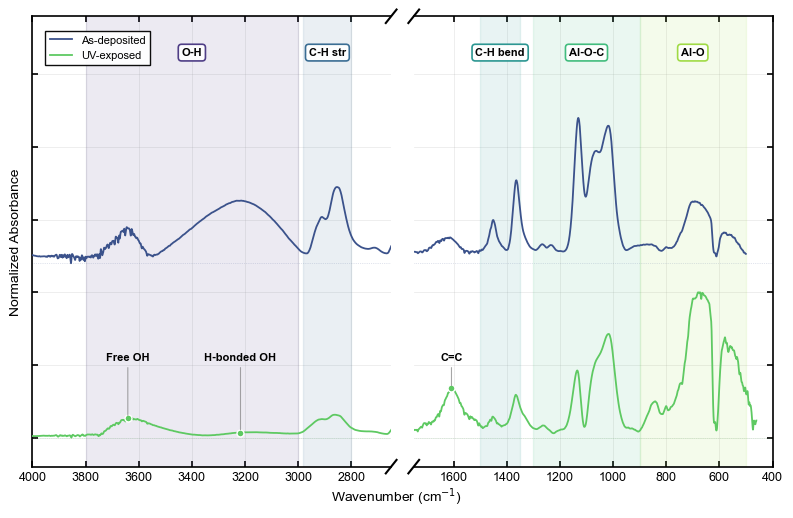


Generating LaTeX table...
LaTeX table saved to ftir_peak_changes.tex
First 10 lines of LaTeX table:
\begin{table}[h]
\centering
\caption{FTIR Peak Assignments and Changes upon UV Exposure}
\label{tab:ftir_peaks}
\begin{tabular}{lccc}
\hline
\textbf{Wavenumber} & \textbf{As-deposited} & \textbf{UV-exposed} & \textbf{Changes} \\
\textbf{(cm$^{-1}$)} & \textbf{Assignment} & \textbf{Assignment} & \\
\hline
3641 & Free O-H stretch & Free O-H stretch & Decreases (44\%) \\

Creating difference spectrum...


C:\Users\dreec\AppData\Local\Temp\ipykernel_11476\715394223.py:75: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


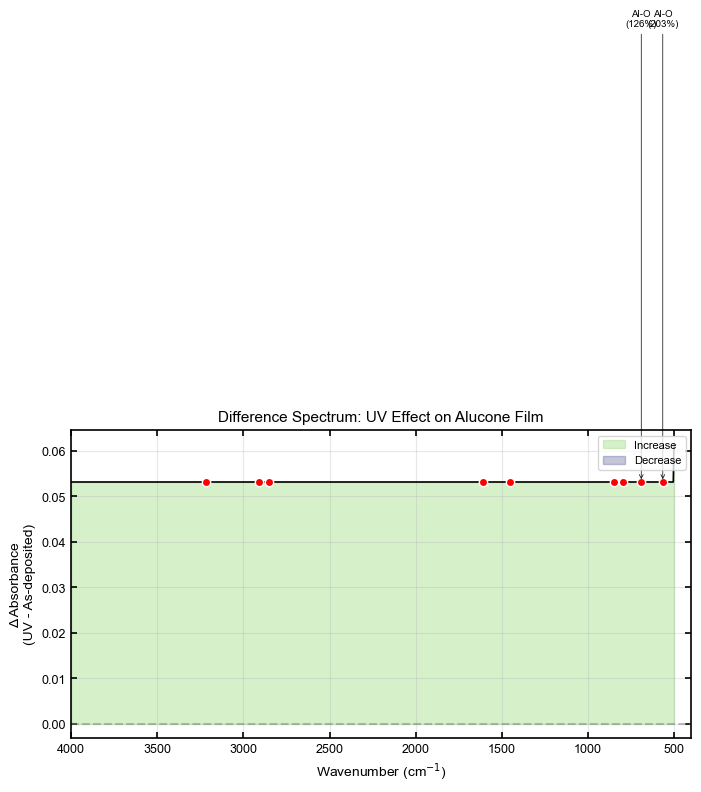


✅ All outputs generated successfully!
Files created:
  - ftir_final_clean.pdf/png
  - ftir_peak_changes.tex
  - ftir_difference_spectrum.pdf/png


In [91]:
# ============================================
# GENERATE ALL OUTPUTS
# ============================================

# 1. Create main plot
print("Creating main FTIR plot...")
fig_main, axes_main = create_publication_plot_final(
    x_asdep, y_asdep, x_uv, y_uv, json_data_adjusted,
    offset=1.2,
    break_start=1750,
    break_end=2650
)
fig_main.savefig('ftir_final_clean.pdf', dpi=600, bbox_inches='tight')
fig_main.savefig('ftir_final_clean.png', dpi=600, bbox_inches='tight')
plt.show()

# 2. Generate LaTeX table
print("\nGenerating LaTeX table...")
latex_table = generate_peak_table(json_data_adjusted, 'ftir_peak_changes.tex')
print("First 10 lines of LaTeX table:")
print('\n'.join(latex_table.split('\n')[:10]))

# 3. Create difference spectrum
print("\nCreating difference spectrum...")
fig_diff, ax_diff = plot_difference_spectrum(x_asdep, y_asdep, x_uv, y_uv, json_data_adjusted)
fig_diff.savefig('ftir_difference_spectrum.pdf', dpi=600, bbox_inches='tight')
fig_diff.savefig('ftir_difference_spectrum.png', dpi=600, bbox_inches='tight')
plt.show()

print("\n✅ All outputs generated successfully!")
print("Files created:")
print("  - ftir_final_clean.pdf/png")
print("  - ftir_peak_changes.tex")
print("  - ftir_difference_spectrum.pdf/png")